In [1]:
!pip install scikit-learn seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

/tmp/ipykernel_6825/4153509760.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_folder = '/tf/data/miem_face_recognition/experiment_3'

In [6]:
model_names = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "SFace"
]

In [7]:
thresholds = {
     "VGG-Face": 1.17,
    "Facenet": 0.8,
    "Facenet512": 1.04,
    "OpenFace": 0.55,
    "DeepFace": 0.64,
    "DeepID": 0.17,
    "ArcFace": 1.13,
    "SFace": 1.055,
}

In [8]:
def calculate_recall(df, model, angle):
    tp = df[(df['model_name'] == model) & (df['angle'] == angle) & (df['verified'] == True)]['model_name'].count()
    all_res = df[(df['model_name'] == model) & (df['angle'] == angle)]['model_name'].count()
    
    recall = tp / all_res
    return recall

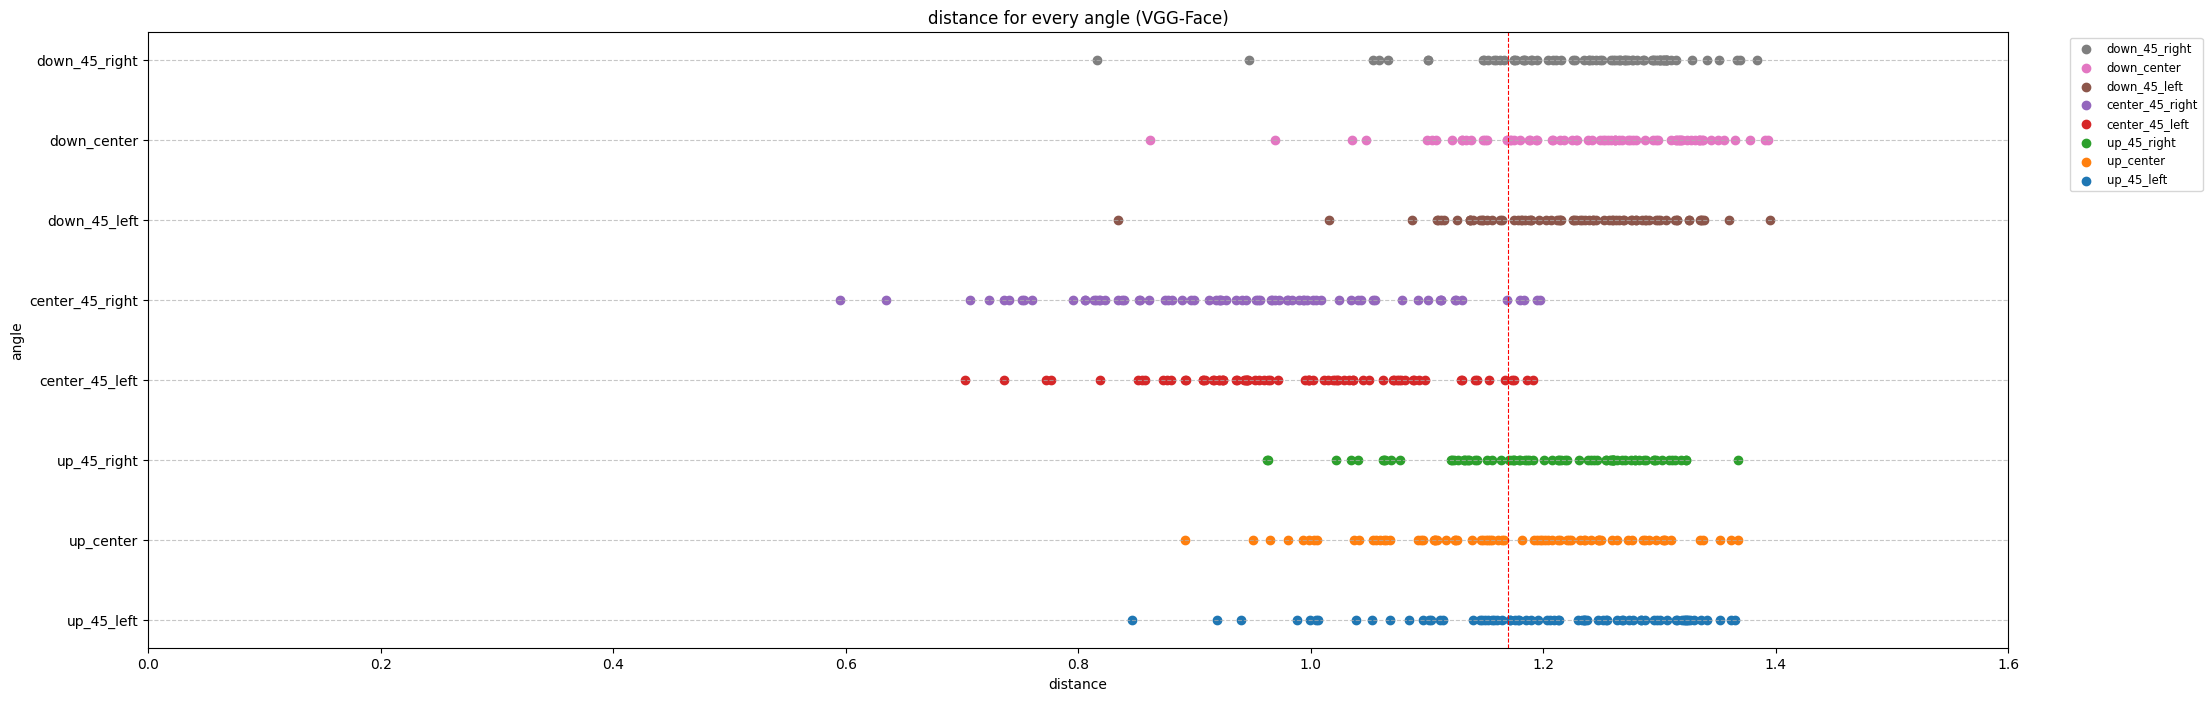

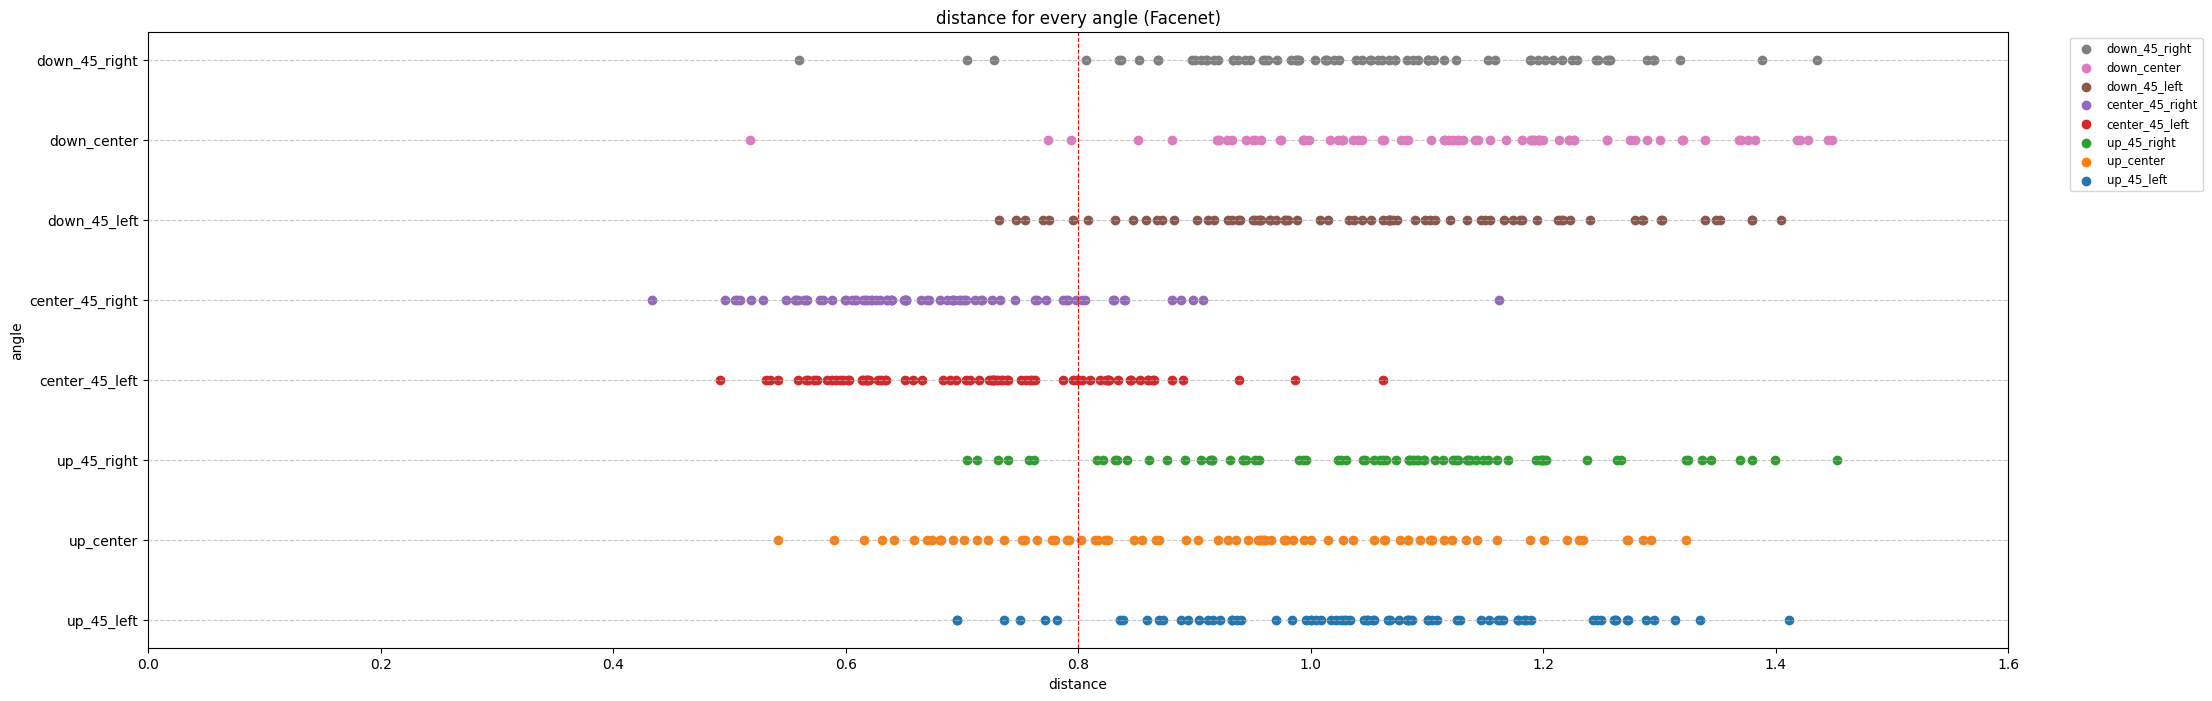

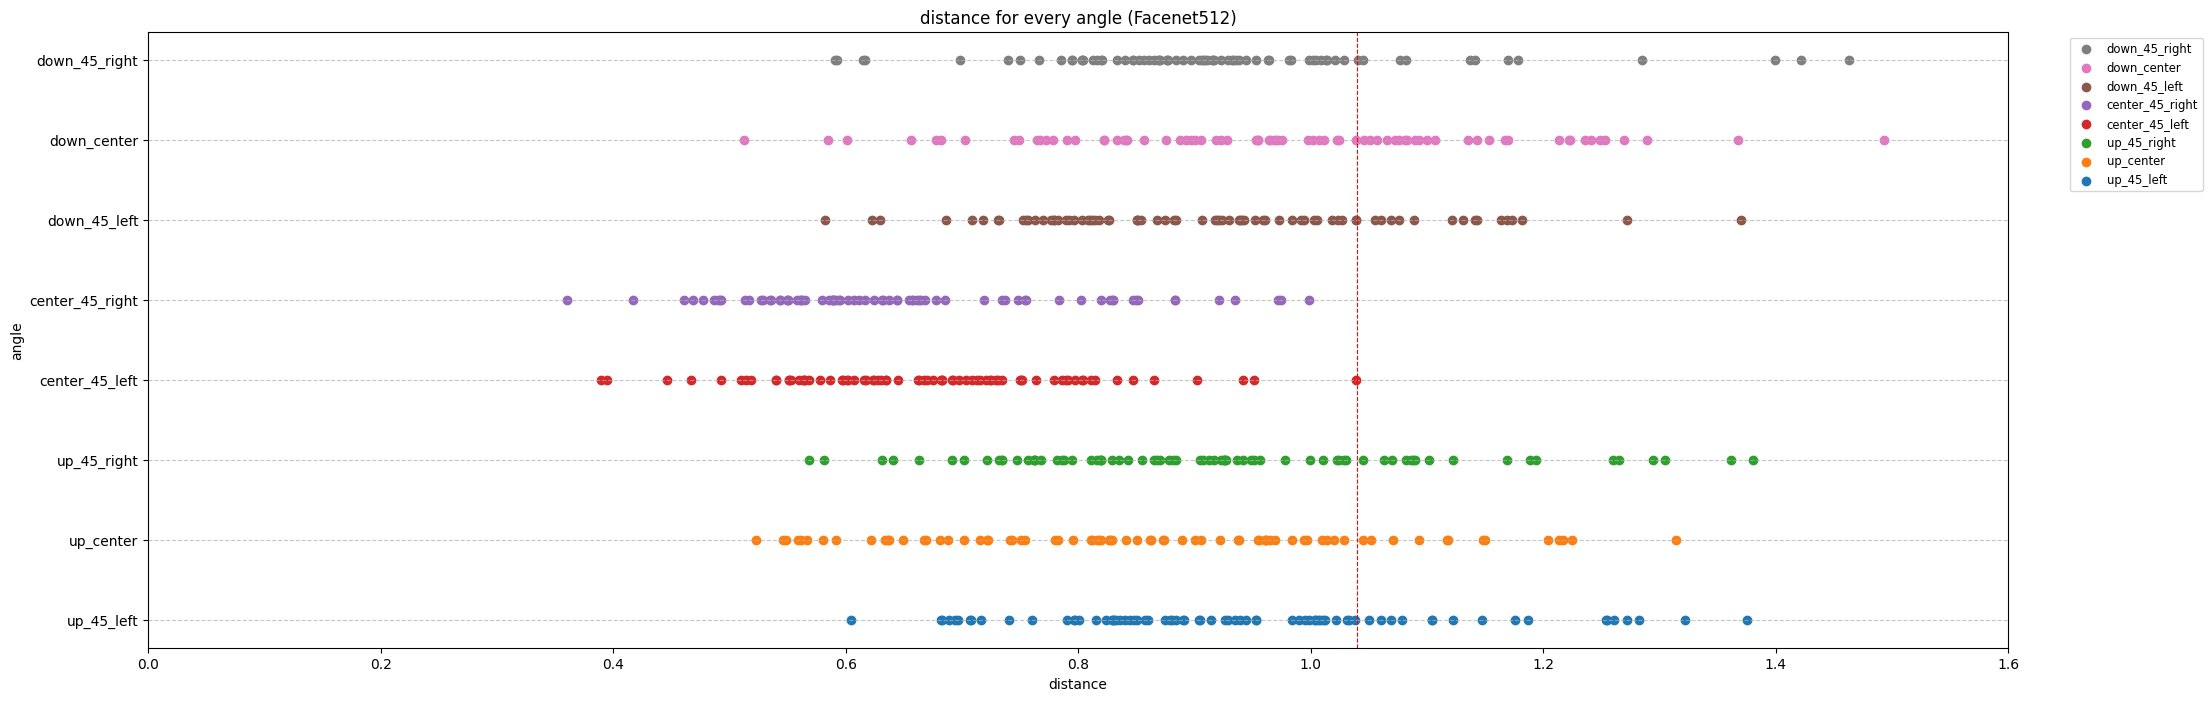

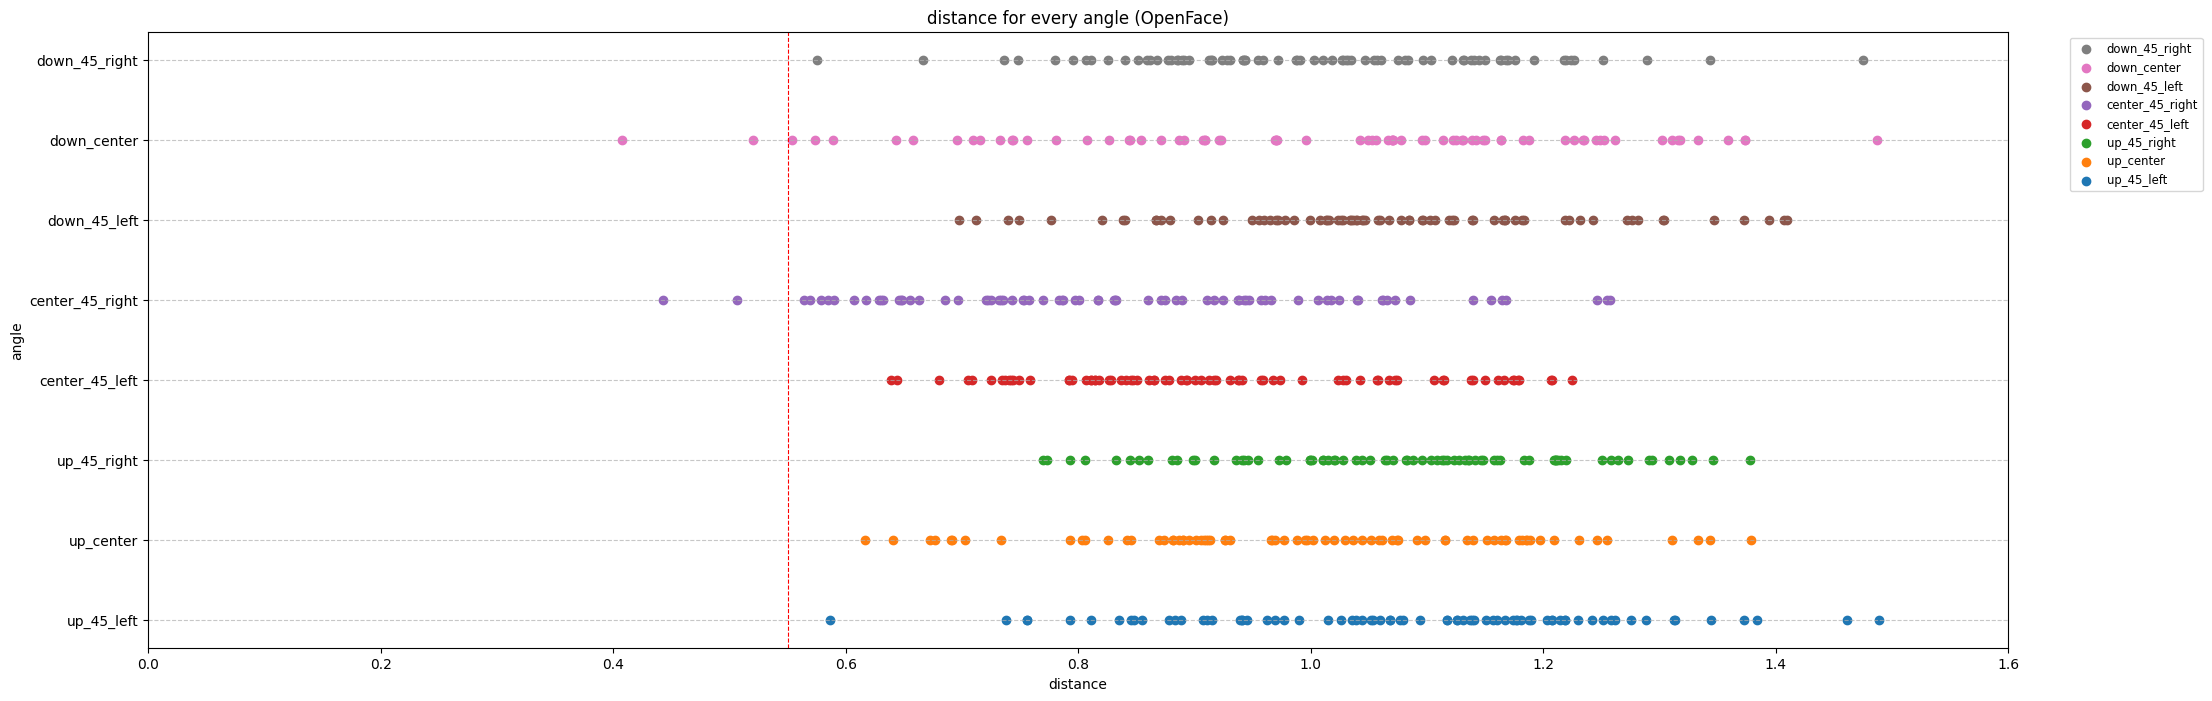

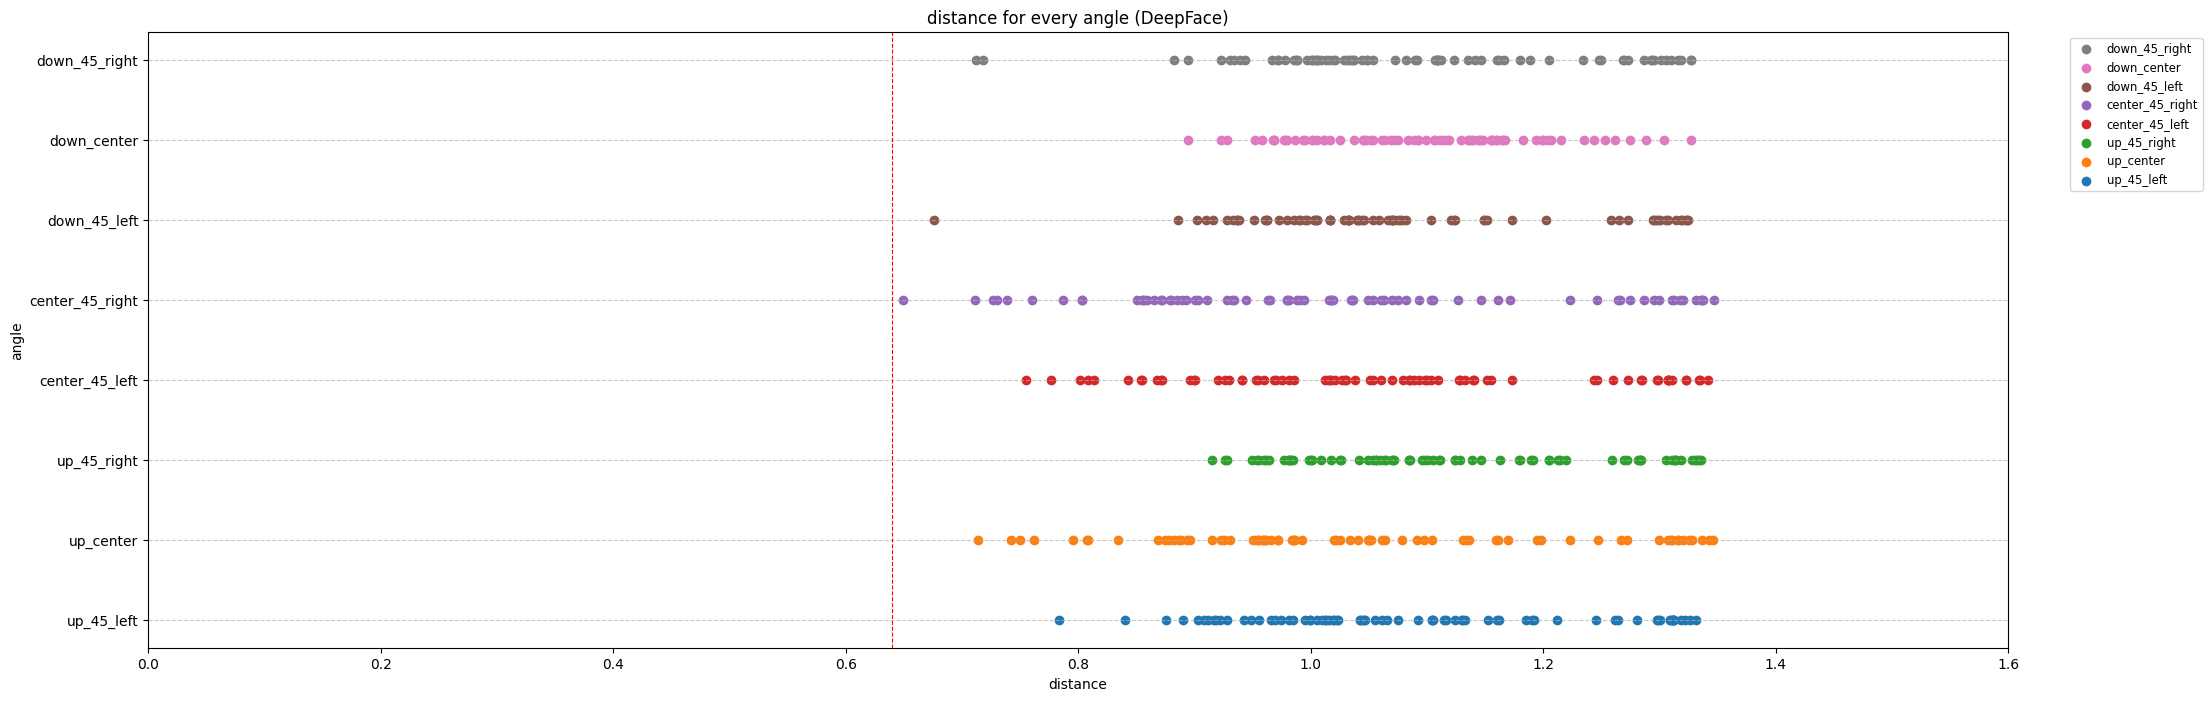

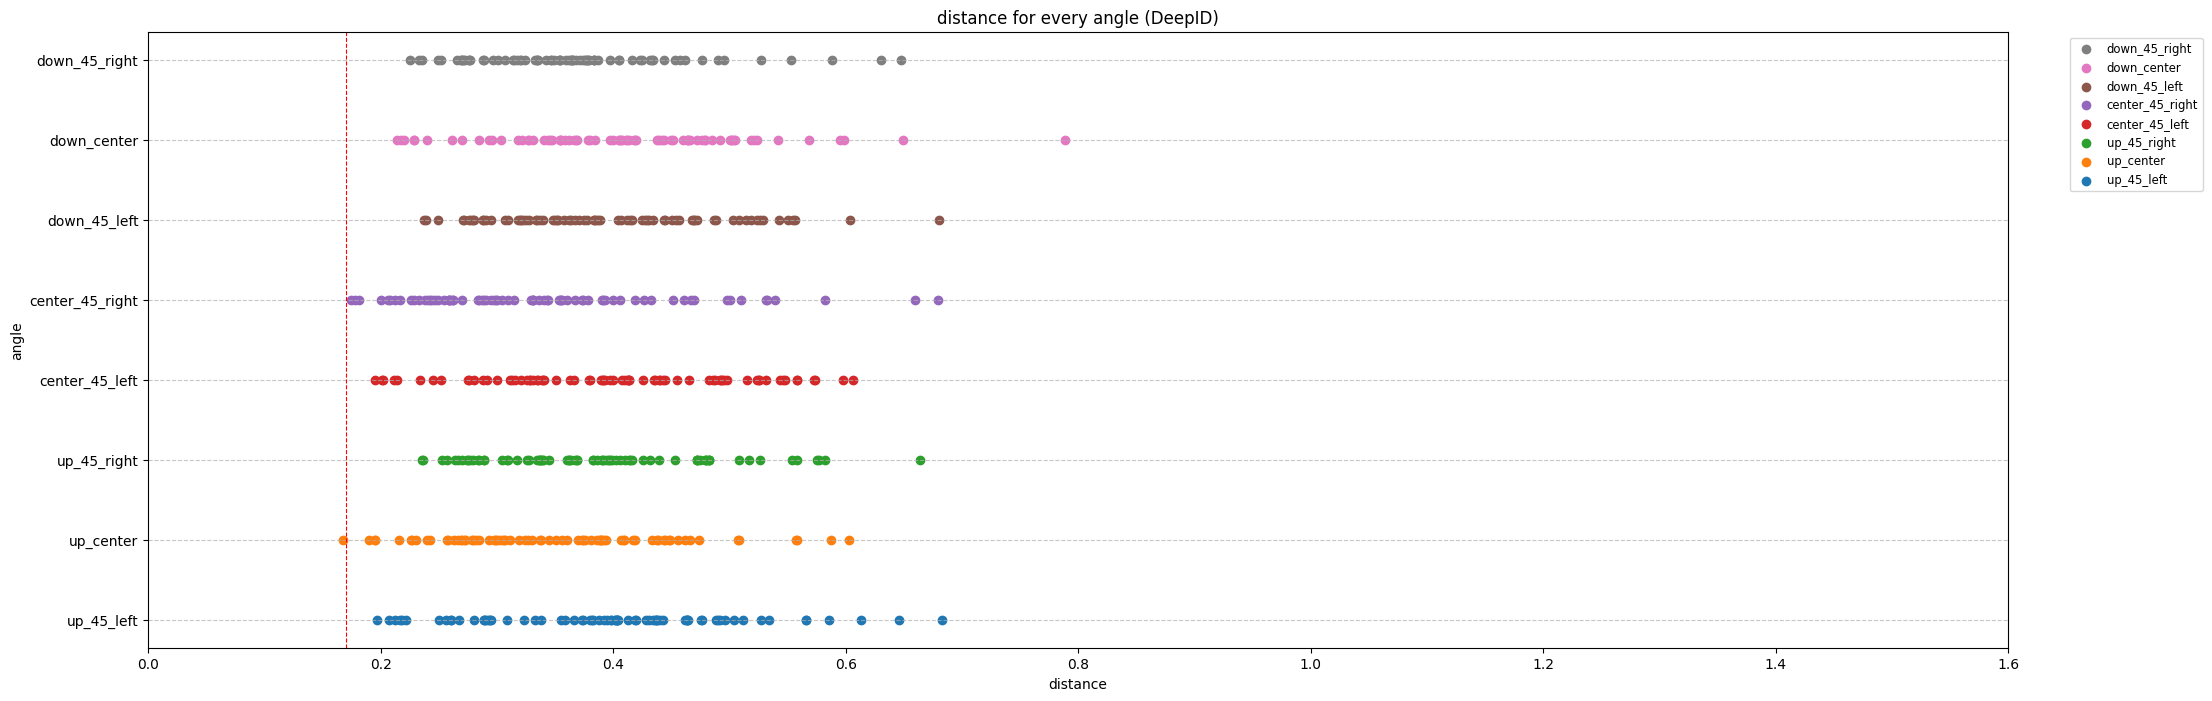

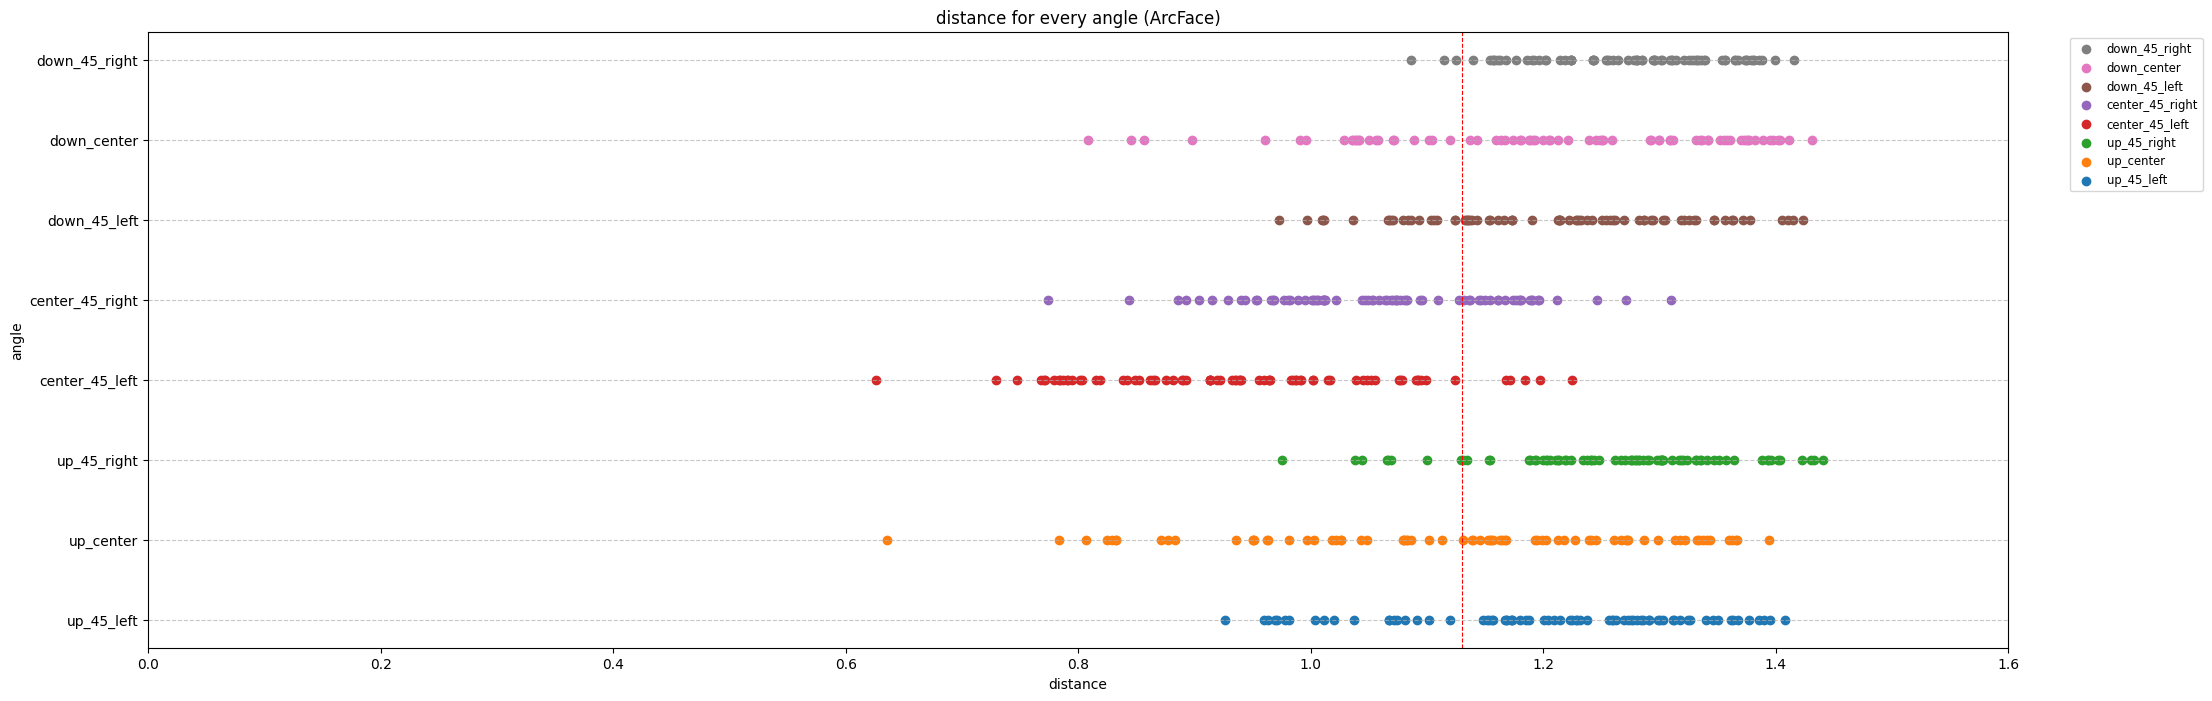

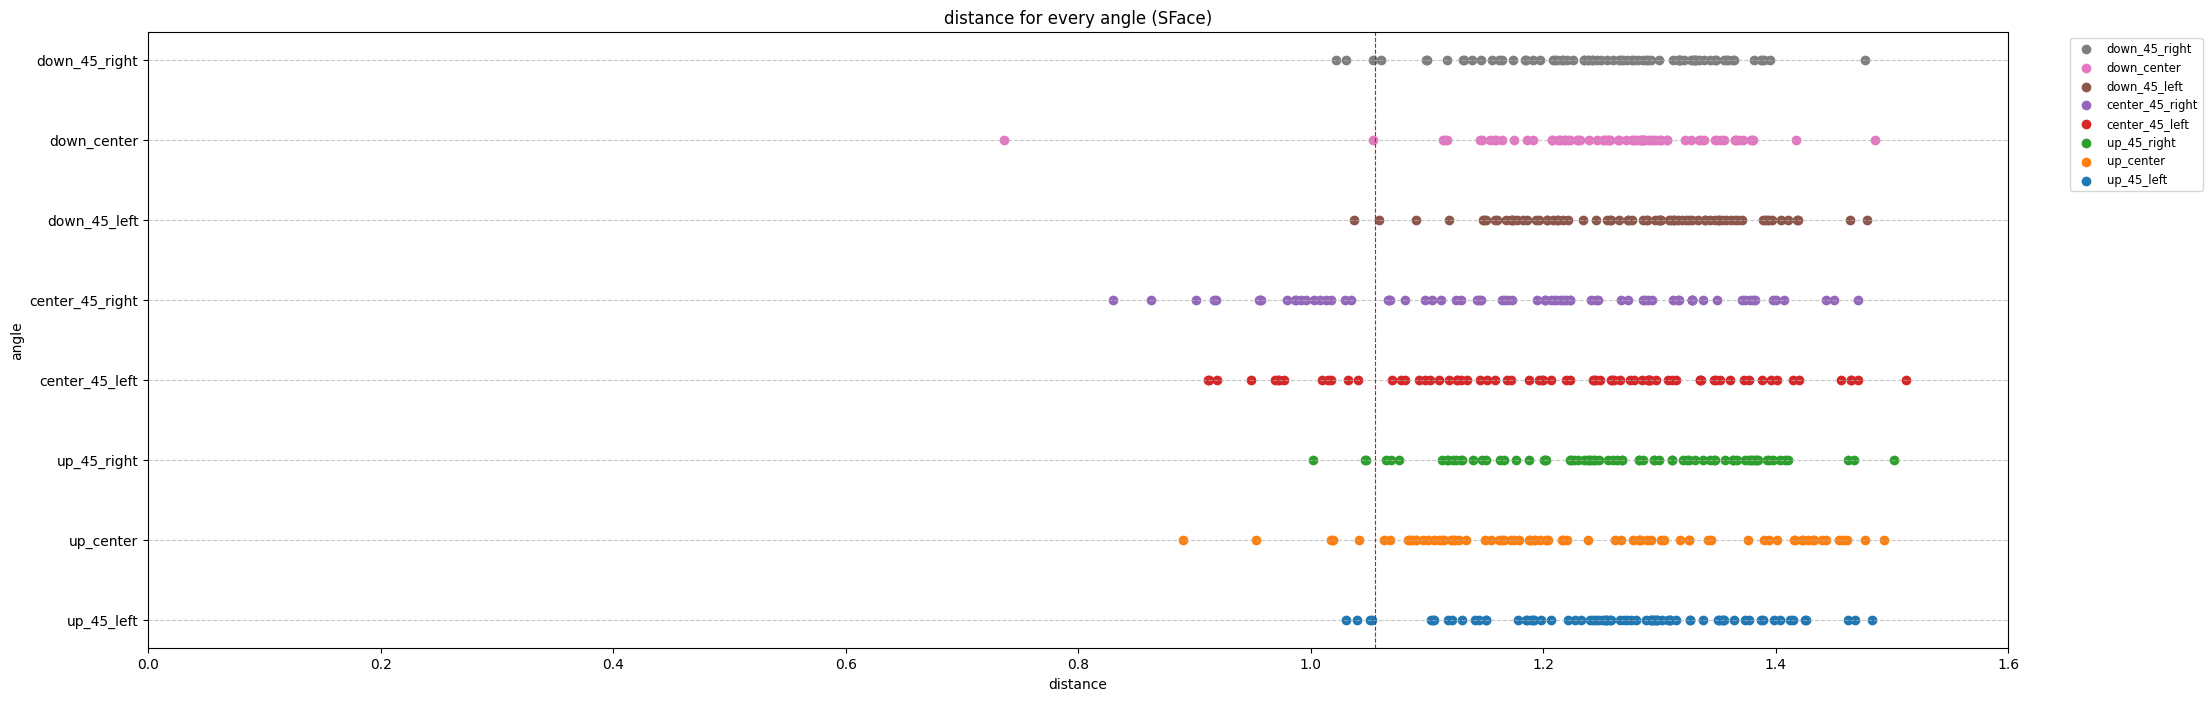

In [9]:
all_recalls = []

for model in model_names:
    plt.figure(figsize=(24, 8))

    for file_name in os.listdir(data_folder):
        if file_name.endswith(".csv") and model in file_name:
            file_path = os.path.join(data_folder, file_name)

            df = pd.read_csv(file_path)

            if model in df['model_name'].unique():
                df['angle'] = df['vertical_position'] + '_' + df['horizontal_position']
                
                for angle in df['angle'].unique():
                    angle_data = df[df['angle'] == angle]
                    plt.scatter(angle_data['distance'], angle_data['angle'], marker='o', label=angle)
                    
                    recall = calculate_recall(df, model, angle)
                    all_recalls.append({'model': model, 'angle': angle, 'recall': recall}) 

    plt.title(f'distance for every angle ({model})')
    plt.xlabel('distance')
    plt.ylabel('angle')
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='small', reverse=True)
    plt.axvline(x=thresholds.get(model, 0), color='red', linestyle='--', linewidth=0.8)
    plt.xticks(np.linspace(0, 1.6, 9))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

recalls_df = pd.DataFrame(all_recalls)
recalls_df.to_csv('recalls.csv', index=False)

In [10]:
recall_results = pd.read_csv('/tf/data/miem_face_recognition/recalls.csv')

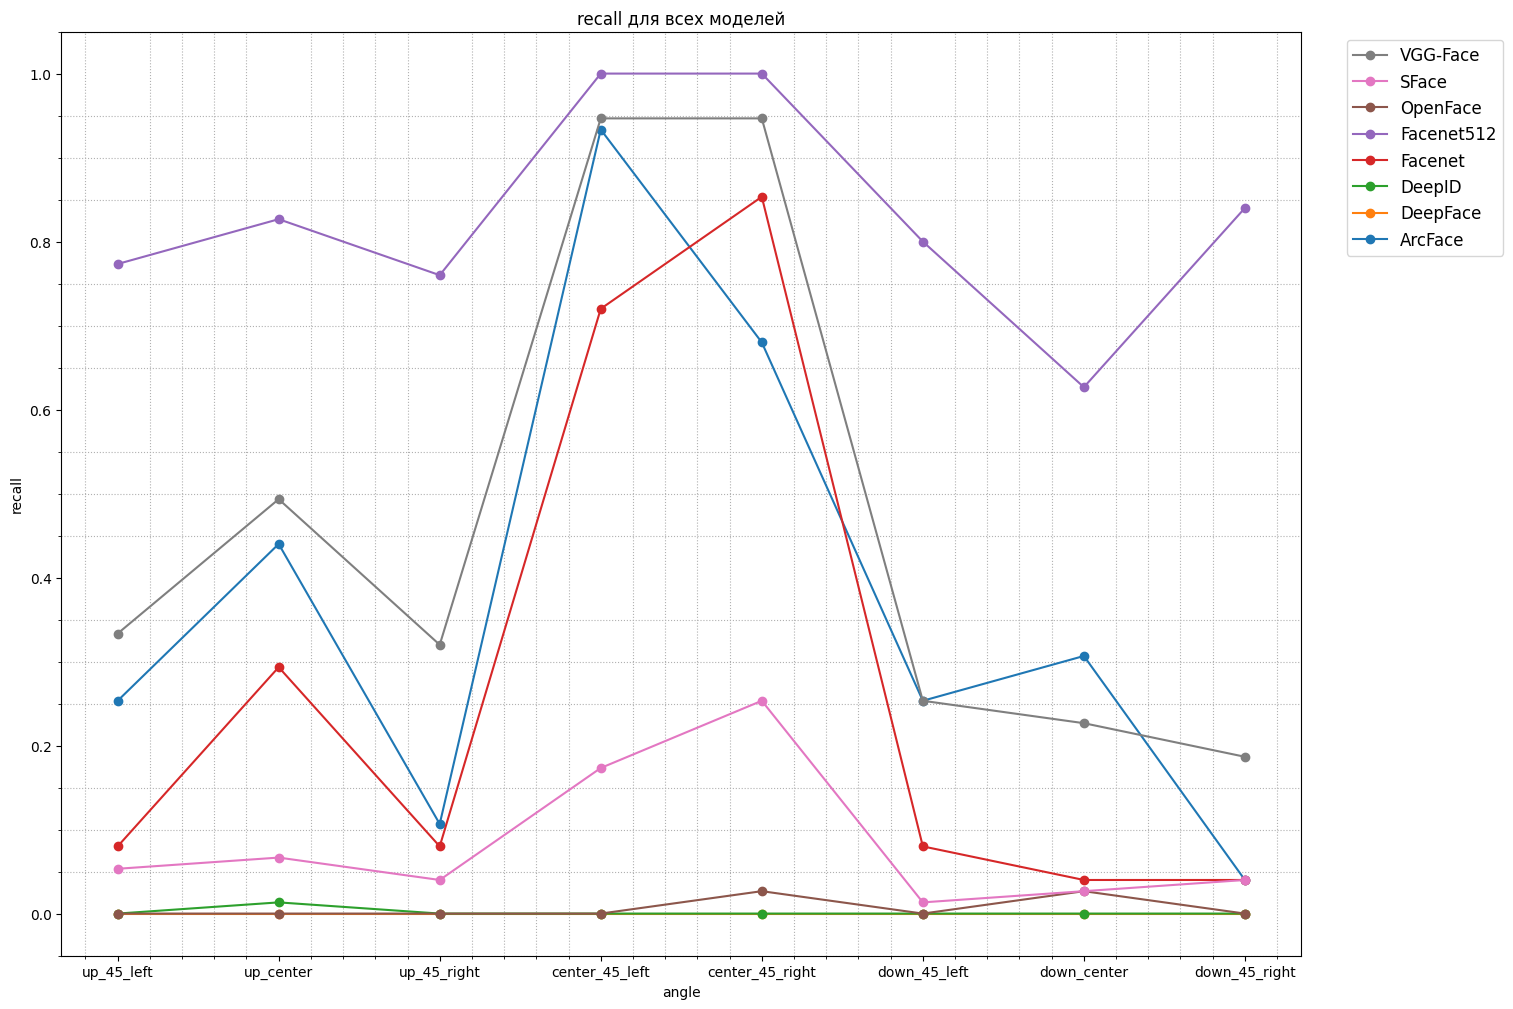

In [11]:
model_groupped = recall_results.groupby('model')

plt.figure(figsize=(16,12))

for model, data in model_groupped:
    # plt.scatter(data['recall'], data['angle'], label=model)
    plt.plot(data['angle'], data['recall'], marker='o', label=model)
    
plt.ylabel('recall')
plt.xlabel('angle')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('recall для всех моделей')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='large', reverse=True)

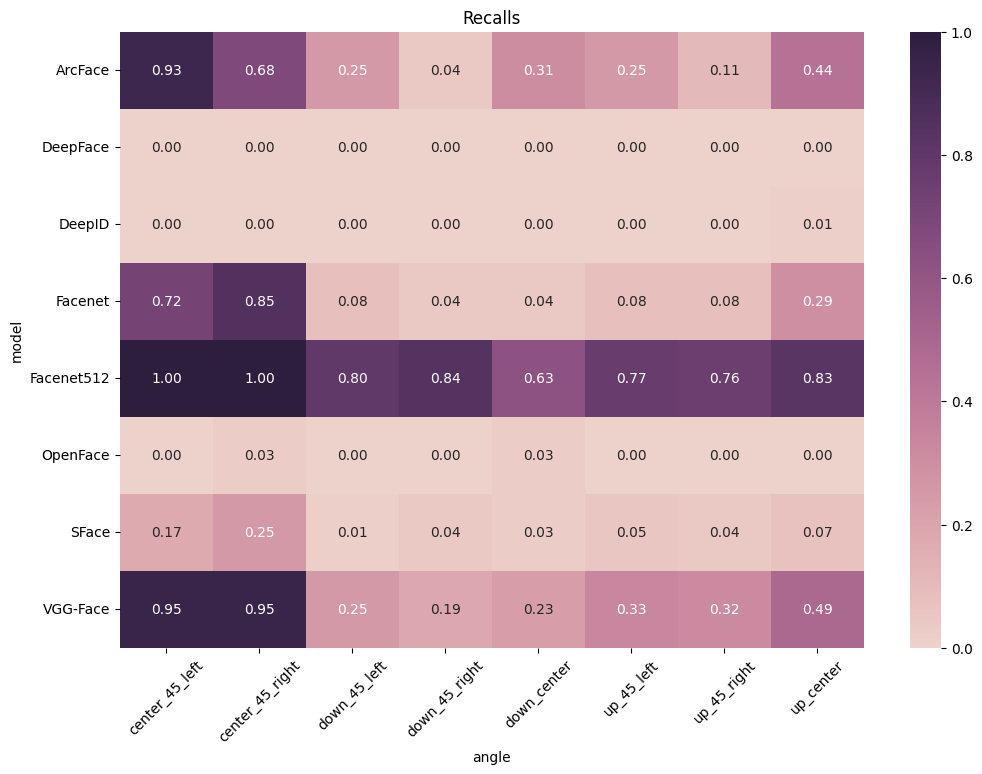

In [12]:
table = recall_results.pivot_table(index='model', columns='angle', values='recall')
plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")

plt.title('Recalls')
plt.xlabel('angle')
plt.ylabel('model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()